In [17]:
import pandas as pd
from pydataset import data

In [33]:
# Coffee data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv")

In [34]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [35]:
df.date = pd.to_datetime(df.date)

In [36]:
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [37]:
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()

In [38]:
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [41]:
# Set the date as the index
df = df.set_index("date").sort_index()

In [42]:
df.head()

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday
2019-01-02,12.905900,2019,1,2,Wednesday
2019-01-03,10.046015,2019,1,3,Thursday
2019-01-04,6.354805,2019,1,4,Friday
2019-01-07,8.545563,2019,1,7,Monday


In [45]:
# Notice how the .dt accessor methods work directly on a datetime .index
df.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=261)

In [51]:
# Isolate ranges of datetimes by the column
df["2019-01-20": "2019-01-28"]

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-21,11.343439,2019,1,21,Monday
2019-01-22,10.945944,2019,1,22,Tuesday
2019-01-23,8.599186,2019,1,23,Wednesday
2019-01-24,8.141553,2019,1,24,Thursday
2019-01-25,9.421176,2019,1,25,Friday
2019-01-28,12.295298,2019,1,28,Monday


In [53]:
# Downsampling to daily means we get rows w/ nulls for the weekend days (and any other missing days)
by_day = df.asfreq("D")
by_day.head()

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019.0,1.0,1.0,Tuesday
2019-01-02,12.905900,2019.0,1.0,2.0,Wednesday
2019-01-03,10.046015,2019.0,1.0,3.0,Thursday
2019-01-04,6.354805,2019.0,1.0,4.0,Friday
2019-01-05,NaN,NaN,NaN,NaN,NaN


In [65]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [66]:
# Group by ever 13 week period
df.resample("13W").mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-04-07,10.318650
2019-07-07,10.055667
2019-10-06,10.384702
2020-01-05,10.477262


In [68]:
# Sum up the coffee consumption by every 2 months
df.resample("2M").sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-03-31,425.817853
2019-05-31,470.510720
2019-07-31,431.923956
2019-09-30,439.696070
2019-11-30,460.673335
2020-01-31,229.986526


In [69]:
# Calculate median coffee consumption every quarter
df.resample("3M").median()

,coffee_consumption
date,
2019-01-31,9.429428
2019-04-30,10.384167
2019-07-31,10.387530
2019-10-31,10.140210
2020-01-31,10.309799


In [71]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [73]:
# Show me February, 2019
df["2019-02"]

,coffee_consumption
date,
2019-02-01,9.042273
2019-02-04,12.673222
2019-02-05,11.562866
2019-02-06,9.532721
2019-02-07,10.128274
2019-02-08,12.080342
2019-02-11,11.449607
2019-02-12,10.384167
2019-02-13,9.361700


In [76]:
# Show the lowest monthly value
df.resample("M").min()

,coffee_consumption
date,
2019-01-31,6.354805
2019-02-28,6.805306
2019-03-31,5.680393
2019-04-30,6.534674
2019-05-31,6.220478
2019-06-30,6.010460
2019-07-31,6.500401
2019-08-31,7.429678
2019-09-30,6.358469


In [78]:
# Show the highest monthly value
df.resample("M").max()

,coffee_consumption
date,
2019-01-31,14.301915
2019-02-28,12.673222
2019-03-31,14.551441
2019-04-30,14.036570
2019-05-31,14.952719
2019-06-30,13.446564
2019-07-31,17.043445
2019-08-31,13.665973
2019-09-30,15.347007


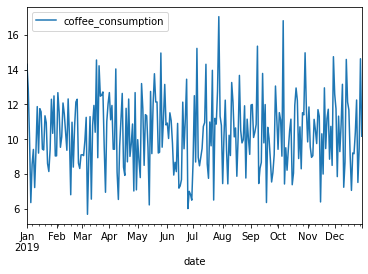

In [79]:
df.plot()

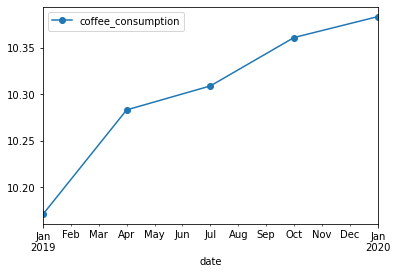

In [80]:
df.resample('3M').mean().plot(marker='o')


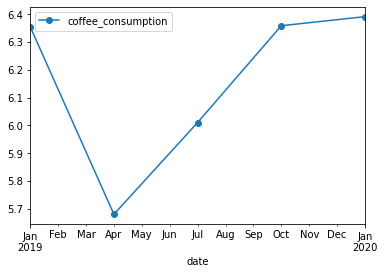

In [81]:
df.resample('3M').min().plot(marker='o')


In [88]:
rolling = df.copy()
rolling["21_day"]= rolling.coffee_consumption.rolling(5).mean()
rolling["45_day"]= rolling.coffee_consumption.rolling(45).mean()

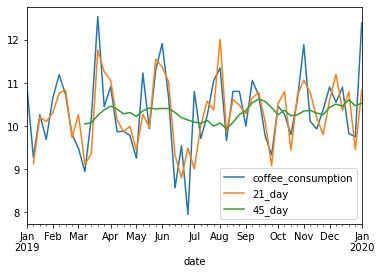

In [91]:
rolling.resample("W").mean().plot()